In [5]:
#check and confirm python version greater than 3.5
import sys
assert sys.version_info >= (3,5)

print(sys.version_info)

sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


In [8]:
#check and confirm sklearn version greater than 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

print(sklearn.__version__)

1.1.1


In [16]:
import os
datapath = os.path.join("/home/shanmuka/Music/datasets", "lifesat", "")

print(datapath)

/home/shanmuka/Music/datasets/lifesat/


In [31]:
#load the dataset
import pandas as pd
oecd_bli = pd.read_csv(datapath+'oecd_bli_2015.csv', thousands=',')

print('oecd_bli shape: ',oecd_bli.shape)

print('oecd_bli columns: ', oecd_bli.columns)

print('oecd_bli head: ', oecd_bli.head(5))

oecd_bli shape:  (3292, 17)
oecd_bli columns:  Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')
oecd_bli head:    LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total

In [22]:
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

print('gdp_percapita shape: ', gdp_per_capita.shape)

print('gdp_percapita columns: ', gdp_per_capita.columns)

print('gdp_percapita heas: ', gdp_per_capita.head(5))

gdp_percapita shape:  (190, 7)
gdp_percapita columns:  Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')
gdp_percapita heas:                 Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

In [32]:
# get entire dataframe where "INEQUALITY" column == 'TOT'

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

print(oecd_bli.shape)

(888, 17)


In [33]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

print('oecd_bli.shape: ',oecd_bli.shape)

print('oecd_bli.columns: : ',oecd_bli.columns)

print(oecd_bli)

oecd_bli.shape:  (37, 24)
oecd_bli.columns: :  Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')
Indicator        Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Australia                 13.0           2.1                         10.5   
Austria 

In [35]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

print('gdp_per_capita.columns: ', gdp_per_capita.columns)

print(gdp_per_capita.head(5))



gdp_per_capita.columns:  Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', 'GDP per capita',
       'Estimates Start After'],
      dtype='object')
               Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes

In [36]:
gdp_per_capita.set_index("Country", inplace=True)

print('gdp_per_capita.shape: ', gdp_per_capita.shape)

print(gdp_per_capita.head(5))

gdp_per_capita.shape:  (190, 6)
                                                    Subject Descriptor  \
Country                                                                  
Afghanistan          Gross domestic product per capita, current prices   
Albania              Gross domestic product per capita, current prices   
Algeria              Gross domestic product per capita, current prices   
Angola               Gross domestic product per capita, current prices   
Antigua and Barbuda  Gross domestic product per capita, current prices   

                            Units  Scale  \
Country                                    
Afghanistan          U.S. dollars  Units   
Albania              U.S. dollars  Units   
Algeria              U.S. dollars  Units   
Angola               U.S. dollars  Units   
Antigua and Barbuda  U.S. dollars  Units   

                                         Country/Series-specific Notes  \
Country                                                           

In [37]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)

print('full_country_stats.shape: ', full_country_stats.shape)

print('full_country_stats.columns: ', full_country_stats.columns)

print('full_country_stats.head: ', full_country_stats.head(5))


full_country_stats.shape:  (36, 30)
full_country_stats.columns:  Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Subject Descriptor', 'Units',
       'Scale', 'Country/Series-specific Notes', 'GDP per capita',
       'Estimates Start After'],
      dtype='object')
full_country_stats.head:             Air pollution  Assault rate  Consultation on rule-making  \
Country     

In [38]:
full_country_stats.sort_values(by="GDP per capita", inplace=True)

In [39]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

In [40]:
full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [16]:
# practice till now


# import required libraries

import pandas as pd
import os


In [17]:
# set paths

BASE_DIR = '/home/shanmuka/Music/datasets'

datapath = os.path.join(BASE_DIR, 'lifesat', '')

print(datapath)



/home/shanmuka/Music/datasets/lifesat/


In [18]:
oecd_bli = pd.read_csv(datapath+'oecd_bli_2015.csv', thousands=',')
print(oecd_bli.shape)
print(oecd_bli.columns)


(3292, 17)
Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')


In [19]:
gdp_per_capita = pd.read_csv(datapath+'gdp_per_capita.csv', delimiter='\t', thousands=',', encoding = 'latin1', na_values='n/a')

print(gdp_per_capita.shape)

print(gdp_per_capita.columns)

(190, 7)
Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')


In [20]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']

oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values='Value')



In [21]:
print(oecd_bli.shape)

(37, 24)


In [22]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

print(gdp_per_capita.shape)

gdp_per_capita.set_index("Country", inplace=True)

print(gdp_per_capita.shape)

(190, 7)
(190, 6)


In [23]:
print(oecd_bli.shape, oecd_bli.columns)
print(gdp_per_capita.shape, gdp_per_capita.columns)
oecd_bli.to_csv('oecd_bli_modified.csv')

gdp_per_capita.to_csv('gdp_per_capita_modified.csv')

(37, 24) Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')
(190, 6) Index(['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes',
       'GDP per capita', 'Estimates Start After'],
      dtype='object')


In [24]:
print(oecd_bli.head(1))

Indicator  Air pollution  Assault rate  Consultation on rule-making  \
Country                                                               
Australia           13.0           2.1                         10.5   

Indicator  Dwellings without basic facilities  Educational attainment  \
Country                                                                 
Australia                                 1.1                    76.0   

Indicator  Employees working very long hours  Employment rate  Homicide rate  \
Country                                                                        
Australia                              14.02             72.0            0.8   

Indicator  Household net adjusted disposable income  \
Country                                               
Australia                                   31588.0   

Indicator  Household net financial wealth  ...  Long-term unemployment rate  \
Country                                    ...                                
A

In [25]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)

print(full_country_stats.shape)

print(full_country_stats.columns)

(36, 30)
Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Subject Descriptor', 'Units',
       'Scale', 'Country/Series-specific Notes', 'GDP per capita',
       'Estimates Start After'],
      dtype='object')


In [26]:
full_country_stats.to_csv('full_country_stats_modified.csv')

In [27]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
df = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print(df.shape)
print(df)
df.to_csv('full_country_stats_removed_iloc.csv')

(29, 2)
                 GDP per capita  Life satisfaction
Country                                           
Belgium               40106.632                6.9
Brazil                 8669.998                7.0
Canada                43331.961                7.3
Chile                 13340.905                6.7
Denmark               52114.165                7.5
Finland               41973.988                7.4
France                37675.006                6.5
Germany               40996.511                7.0
Greece                18064.288                4.8
Hungary               12239.894                4.9
Iceland               50854.583                7.5
Ireland               51350.744                7.0
Israel                35343.336                7.4
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Korea                 27195.197                5.8
Luxembourg           101994.093                6.9
Mexico                 

In [29]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [33]:
import numpy as np
print(df["GDP per capita"])
print(df["Life satisfaction"].shape)

X = np.c_[df["GDP per capita"]]
y = np.c_[df["Life satisfaction"]]




Country
Belgium             40106.632
Brazil               8669.998
Canada              43331.961
Chile               13340.905
Denmark             52114.165
Finland             41973.988
France              37675.006
Germany             40996.511
Greece              18064.288
Hungary             12239.894
Iceland             50854.583
Ireland             51350.744
Israel              35343.336
Italy               29866.581
Japan               32485.545
Korea               27195.197
Luxembourg         101994.093
Mexico               9009.280
Netherlands         43603.115
New Zealand         37044.891
Norway              74822.106
Poland              12495.334
Portugal            19121.592
Russia               9054.914
Slovak Republic     15991.736
Slovenia            20732.482
Spain               25864.721
Sweden              49866.266
Switzerland         80675.308
Name: GDP per capita, dtype: float64
(29,)
[[ 40106.632]
 [  8669.998]
 [ 43331.961]
 [ 13340.905]
 [ 52114.165]
 [ 41973.

In [34]:
print(X)
print(y.shape)

[[ 40106.632]
 [  8669.998]
 [ 43331.961]
 [ 13340.905]
 [ 52114.165]
 [ 41973.988]
 [ 37675.006]
 [ 40996.511]
 [ 18064.288]
 [ 12239.894]
 [ 50854.583]
 [ 51350.744]
 [ 35343.336]
 [ 29866.581]
 [ 32485.545]
 [ 27195.197]
 [101994.093]
 [  9009.28 ]
 [ 43603.115]
 [ 37044.891]
 [ 74822.106]
 [ 12495.334]
 [ 19121.592]
 [  9054.914]
 [ 15991.736]
 [ 20732.482]
 [ 25864.721]
 [ 49866.266]
 [ 80675.308]]
(29, 1)


         GDP per capita  Life satisfaction
Country                                   
Belgium       40106.632                6.9
Brazil         8669.998                7.0
Canada        43331.961                7.3
Chile         13340.905                6.7
Denmark       52114.165                7.5


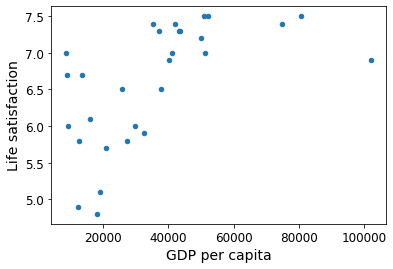

In [37]:
import matplotlib.pyplot as plt

print(df.head(5))

# Visualize the data
df.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [44]:
import sklearn.linear_model


model = sklearn.linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [45]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[6.30707099]]


In [46]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]

[[5.76666667]]
